# House Price Prediction

Dataset Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

Goal is to predict sale price of houses using regression.

I will build a data science pipeline which will help predict the sale price of houses. The pipeline is as follows:
  1. Data Wrangling and Preprocessing
  2. Exploratory Data Analysis
  3. Feature Selection
  4. Model Training
  5. Testing and Optimization

I will use Mean Sqaured Error as the evaluation meteric.


In [1]:
import sys
!{sys.executable} -m pip install 'missingno'

In [2]:
# Libraries
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
from google.colab import files
uploaded2 = files.upload()

Saving test.csv to test.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
df2 = pd.read_csv(io.BytesIO(uploaded2['test.csv']))
# Dataset is now stored in a Pandas Dataframe

In [7]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [8]:
df2.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [9]:
df.shape

(1460, 81)

In [10]:
df2.shape

(1459, 80)

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [15]:
df2.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [16]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [17]:
df2.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

In [18]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [19]:
df2.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

## Data Wrangling and Preprocessing

The steps involved are as follows:

1. Look for Null or Missing Values
2. Change data type of features, if required
3. Encode data of categorical features
4. Deal with Null or Missing values

In [20]:
df.isnull().values.any()

True

In [21]:
df2.isnull().values.any()

True

In [22]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [23]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [24]:
df2.columns[df2.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

The function missing_zero_values_table(datframe_name) is taken from StackOverflow. Link to source:  https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values

Link to answer containing this function: https://stackoverflow.com/a/56671419




In [25]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 81 columns and 1460 Rows.
There are 19 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
PoolQC                  0            1453               99.5   
MiscFeature             0            1406               96.3   
Alley                   0            1369               93.8   
Fence                   0            1179               80.8   
FireplaceQu             0             690               47.3   
LotFrontage             0             259               17.7   
GarageType              0              81                5.5   
GarageYrBlt             0              81                5.5   
GarageFinish            0              81                5.5   
GarageQual              0              81                5.5   
GarageCond              0              81                5.5   
BsmtExposure            0              38                2.6   
BsmtFinType2            0              38                2.6   
BsmtFinType1            0              37                2.5   
BsmtCond                0              37                2.5   
BsmtQual                0              37                2.5   
MasVnrArea            861               8                0.5   
MasVnrType              0               8                0.5   
Electrical              0               1                0.1   

              Total Zero Missing Values  % Total Zero Missing Values Data Type  
PoolQC                             1453                         99.5    object  
MiscFeature                        1406                         96.3    object  
Alley                              1369                         93.8    object  
Fence                              1179                         80.8    object  
FireplaceQu                         690                         47.3    object  
LotFrontage                         259                         17.7   float64  
GarageType                           81                          5.5    object  
GarageYrBlt                          81                          5.5   float64  
GarageFinish                         81                          5.5    object  
GarageQual                           81                          5.5    object  
GarageCond                           81                          5.5    object  
BsmtExposure                         38                          2.6    object  
BsmtFinType2                         38                          2.6    object  
BsmtFinType1                         37                          2.5    object  
BsmtCond                             37                          2.5    object  
BsmtQual                             37                          2.5    object  
MasVnrArea                          869                         59.5   float64  
MasVnrType                            8                          0.5    object  
Electrical                            1                          0.1    object

In [26]:
missing_zero_values_table(df2)

Your selected dataframe has 80 columns and 1459 Rows.
There are 33 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
PoolQC                  0            1456               99.8   
MiscFeature             0            1408               96.5   
Alley                   0            1352               92.7   
Fence                   0            1169               80.1   
FireplaceQu             0             730               50.0   
LotFrontage             0             227               15.6   
GarageCond              0              78                5.3   
GarageYrBlt             0              78                5.3   
GarageQual              0              78                5.3   
GarageFinish            0              78                5.3   
GarageType              0              76                5.2   
BsmtCond                0              45                3.1   
BsmtExposure            0              44                3.0   
BsmtQual                0              44                3.0   
BsmtFinType1            0              42                2.9   
BsmtFinType2            0              42                2.9   
MasVnrType              0              16                1.1   
MasVnrArea            877              15                1.0   
MSZoning                0               4                0.3   
BsmtFullBath          849               2                0.1   
BsmtHalfBath         1364               2                0.1   
Functional              0               2                0.1   
Utilities               0               2                0.1   
GarageCars             76               1                0.1   
GarageArea             76               1                0.1   
TotalBsmtSF            41               1                0.1   
KitchenQual             0               1                0.1   
BsmtUnfSF             123               1                0.1   
BsmtFinSF2           1278               1                0.1   
BsmtFinSF1            462               1                0.1   
Exterior2nd             0               1                0.1   
Exterior1st             0               1                0.1   
SaleType                0               1                0.1   

              Total Zero Missing Values  % Total Zero Missing Values Data Type  
PoolQC                             1456                         99.8    object  
MiscFeature                        1408                         96.5    object  
Alley                              1352                         92.7    object  
Fence                              1169                         80.1    object  
FireplaceQu                         730                         50.0    object  
LotFrontage                         227                         15.6   float64  
GarageCond                           78                          5.3    object  
GarageYrBlt                          78                          5.3   float64  
GarageQual                           78                          5.3    object  
GarageFinish                         78                          5.3    object  
GarageType                           76                          5.2    object  
BsmtCond                             45                          3.1    object  
BsmtExposure                         44                          3.0    object  
BsmtQual                             44                          3.0    object  
BsmtFinType1                         42                          2.9    object  
BsmtFinType2                         42                          2.9    object  
MasVnrType                           16                          1.1    object  
MasVnrArea                          892                         61.1   float64  
MSZoning                              4                          0.3    object  
BsmtFullBath                        851                         58.3   float64  
BsmtHalfBath                       1366                         93.6   float64  
Functional                            2                

In [27]:
col_list = [c for c in df.columns if df[c].dtype == 'object']
col_list

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
col_list2 = [c for c in df2.columns if df2[c].dtype == 'object']
col_list2

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [29]:
train_data=df.copy()

In [30]:
test_data=df2.copy()

In [31]:
# Change data types of columns
for c in col_list:
    if c != 'SalePrice':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [32]:
# Change data types of columns
for c in col_list2:
    if c != 'SalePrice':
        test_data[c] = test_data[c].astype('category')
        test_data[c] = test_data[c].cat.codes

In [33]:
# Compare Actual and Encoded labels
for c in col_list:
    if c != 'SalePrice':
        print('column:', c)
        print(df[c].unique().tolist())
        print(train_data[c].unique().tolist(), '\n')

column: MSZoning
['RL', 'RM', 'C (all)', 'FV', 'RH']
[3, 4, 0, 1, 2] 

column: Street
['Pave', 'Grvl']
[1, 0] 

column: Alley
[nan, 'Grvl', 'Pave']
[-1, 0, 1] 

column: LotShape
['Reg', 'IR1', 'IR2', 'IR3']
[3, 0, 1, 2] 

column: LandContour
['Lvl', 'Bnk', 'Low', 'HLS']
[3, 0, 2, 1] 

column: Utilities
['AllPub', 'NoSeWa']
[0, 1] 

column: LotConfig
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
[4, 2, 0, 1, 3] 

column: LandSlope
['Gtl', 'Mod', 'Sev']
[0, 1, 2] 

column: Neighborhood
['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
[5, 24, 6, 15, 11, 21, 14, 17, 3, 19, 16, 12, 20, 9, 10, 7, 23, 8, 22, 4, 13, 0, 2, 18, 1] 

column: Condition1
['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
[2, 1, 4, 0, 5, 8, 6, 3, 7] 

column: Condition2
['Norm'

In [34]:
# Compare Actual and Encoded labels
for c in col_list2:
    if c != 'SalePrice':
        print('column:', c)
        print(df2[c].unique().tolist())
        print(test_data[c].unique().tolist(), '\n')

column: MSZoning
['RH', 'RL', 'RM', 'FV', 'C (all)', nan]
[2, 3, 4, 1, 0, -1] 

column: Street
['Pave', 'Grvl']
[1, 0] 

column: Alley
[nan, 'Pave', 'Grvl']
[-1, 1, 0] 

column: LotShape
['Reg', 'IR1', 'IR2', 'IR3']
[3, 0, 1, 2] 

column: LandContour
['Lvl', 'HLS', 'Bnk', 'Low']
[3, 1, 0, 2] 

column: Utilities
['AllPub', nan]
[0, -1] 

column: LotConfig
['Inside', 'Corner', 'FR2', 'CulDSac', 'FR3']
[4, 0, 2, 1, 3] 

column: LandSlope
['Gtl', 'Mod', 'Sev']
[0, 1, 2] 

column: Neighborhood
['NAmes', 'Gilbert', 'StoneBr', 'BrDale', 'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'Somerst', 'SawyerW', 'Sawyer', 'NWAmes', 'OldTown', 'BrkSide', 'ClearCr', 'SWISU', 'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'IDOTRR', 'Mitchel', 'Timber', 'MeadowV', 'Veenker']
[12, 8, 22, 2, 13, 16, 0, 15, 21, 20, 19, 14, 17, 3, 4, 18, 7, 5, 6, 1, 9, 11, 23, 10, 24] 

column: Condition1
['Feedr', 'Norm', 'PosN', 'RRNe', 'Artery', 'RRNn', 'PosA', 'RRAn', 'RRAe']
[1, 2, 4, 7, 0, 8, 3, 6, 5] 

column: Condition2
['

In [90]:
from sklearn import preprocessing

In [91]:
le = preprocessing.LabelEncoder()
for name in df.columns:
    if df[name].dtypes == 'O':
        df[name] = df[name].astype(str)
        le.fit(df[name])
        df[name] = le.transform(df[name])

In [92]:
for name in df2.columns:
    if df2[name].dtypes == 'O':
        df2[name] = df2[name].astype(str)
        le.fit(df2[name])
        df2[name] = le.transform(df2[name])

In [93]:
for column in df.columns:
    null_vals = df.isnull().values
    a, b = np.unique(df.values[~null_vals], return_counts = 1)
    df.loc[df[column].isna(), column] = np.random.choice(a, df[column].isnull().sum(), p = b / b.sum())


In [94]:
train_data['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [95]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [96]:
# Deal with Missing Values
columns = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']

for c in columns:
    missing_vals = train_data[c].isnull().sum()
    observed_vals = train_data.loc[train_data[c].notnull(), c]
    train_data.loc[train_data[c].isnull(), c] = observed_vals.mean()
#     df.loc[df[c].isnull(), c] = np.random.choice(observed_vals, missing_vals, replace = True)


In [97]:
# Deal with Missing Values
columns = ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType']

for c in columns:
    missing_vals = test_data[c].isnull().sum()
    observed_vals = test_data.loc[test_data[c].notnull(), c]
    test_data.loc[test_data[c].isnull(), c] = observed_vals.mean()
#     df.loc[df[c].isnull(), c] = np.random.choice(observed_vals, missing_vals, replace = True)


In [98]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [67]:
missing_zero_values_table(train_data)

Your selected dataframe has 81 columns and 1460 Rows.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Zero Values, Missing Values, % of Total Values, Total Zero Missing Values, % Total Zero Missing Values, Data Type]
Index: []

In [99]:
missing_zero_values_table(test_data)

Your selected dataframe has 81 columns and 1459 Rows.
There are 1 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
SalePrice            0            1459              100.0   

           Total Zero Missing Values  % Total Zero Missing Values Data Type  
SalePrice                       1459                        100.0   float64

In [100]:
frames = [df, df2]

result = pd.concat(frames)

In [101]:
print(result)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4         21.0     1936       1      2   
1455  2916         160         4         21.0     1894       1      2   
1456  2917          20         3        160.0    20000       1      2   
1457  2918          85         3         62.0    10441       1      2   
1458  2919          60         3         74.0     9627       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...        

In [102]:
result.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
SalePrice        float64
Length: 81, dtype: object

Now we can see that there are no columns with missing values. Now, we will move to exploratory data anlysis.

In [103]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [112]:
X = df.drop(['SalePrice', 'Id'], axis = 1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [113]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [114]:
# make predictions based on model
predictions = model.predict(X_test)

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [109]:
from math import sqrt

In [116]:
print ('MAE is:', mean_absolute_error(y_test, predictions))
print ('MSE is:', mean_squared_error(y_test, predictions))
print ('RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

MAE is: 21095.96397190684
MSE is: 1149015407.4266307
RMSE is: 33897.129781540956


Text(0.5, 1.0, 'Linear Regression Model')

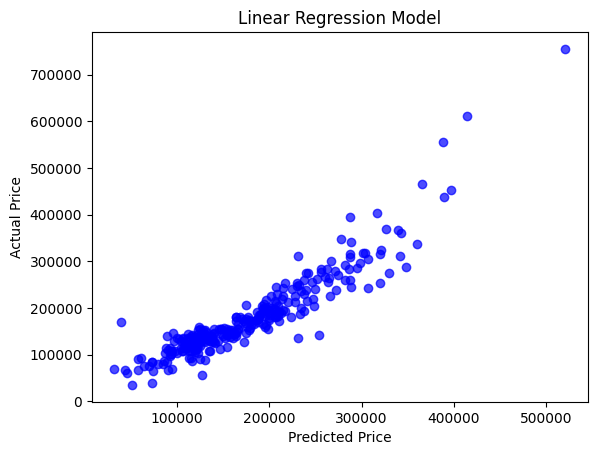

In [117]:
# alpha helps to show overlapping data
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [119]:
submission = pd.DataFrame()
submission['Id'] = df2['Id'].astype(int)

In [120]:
temp = df2.select_dtypes(include = [np.number]).drop(['Id'], axis = 1).interpolate()

In [121]:
predictions = model.predict(temp)
predictions = np.exp(predictions)
submission['SalePrice'] = predictions

<ipython-input-121-f905cb8065c1>:2: RuntimeWarning: overflow encountered in exp
  predictions = np.exp(predictions)


In [122]:
submission.to_csv('submission.csv', index = False)

## Data Analysis and Visualizations

https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python



<ipython-input-50-82a0a68effc2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice']);


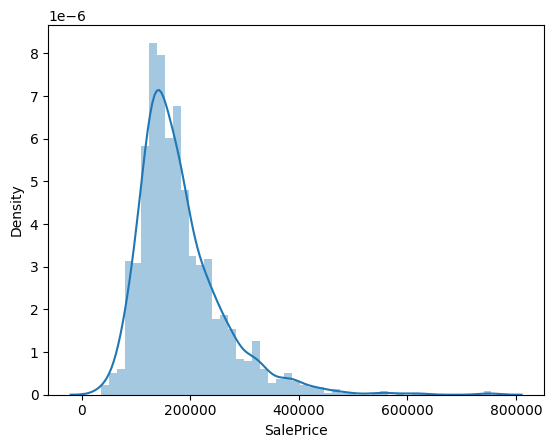

In [50]:
sns.distplot(train_data['SalePrice']);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


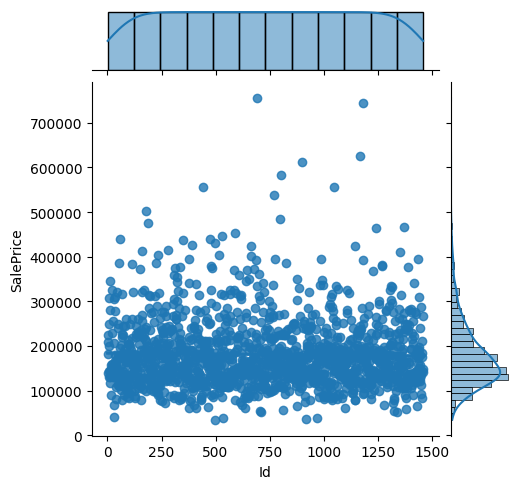

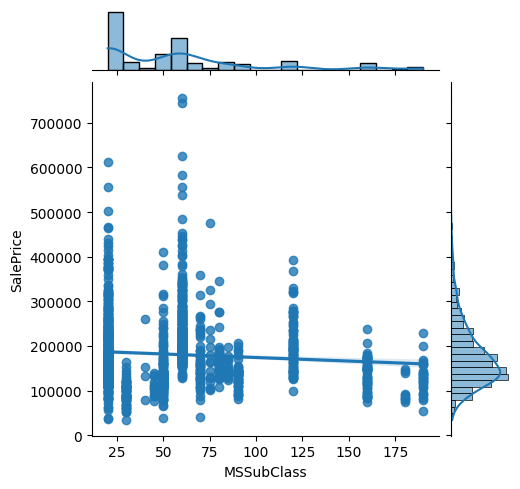

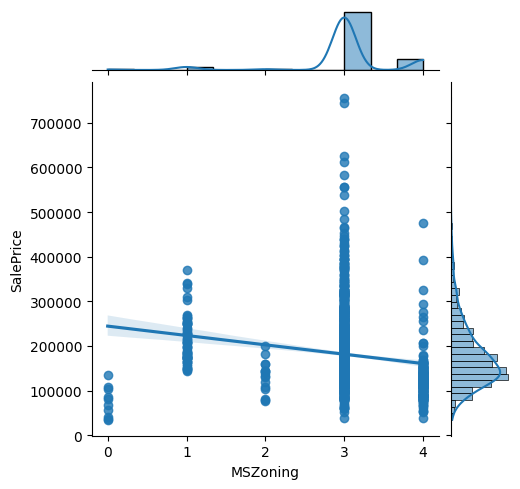

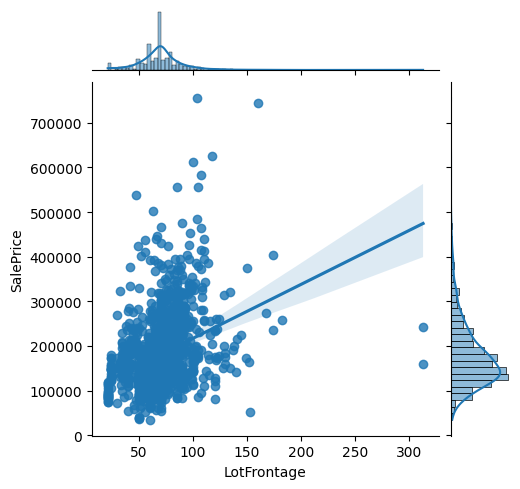

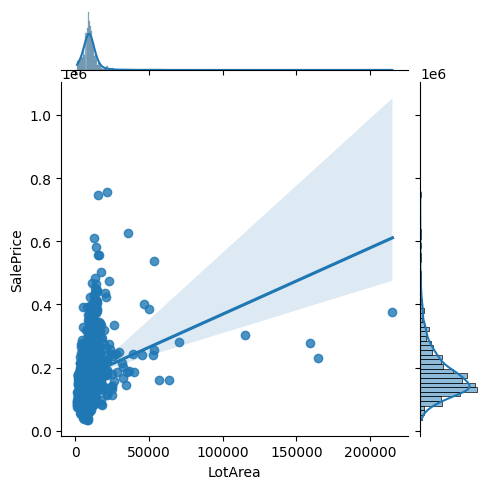

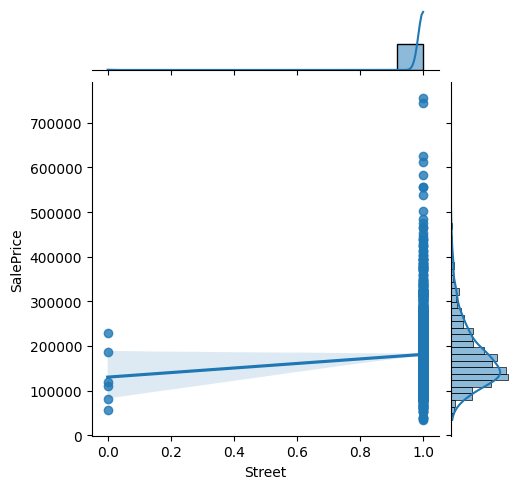

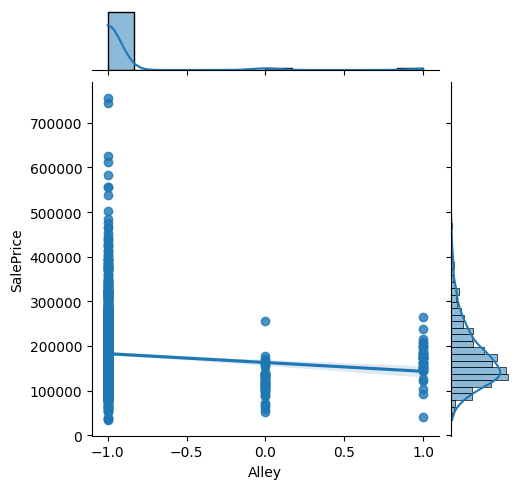

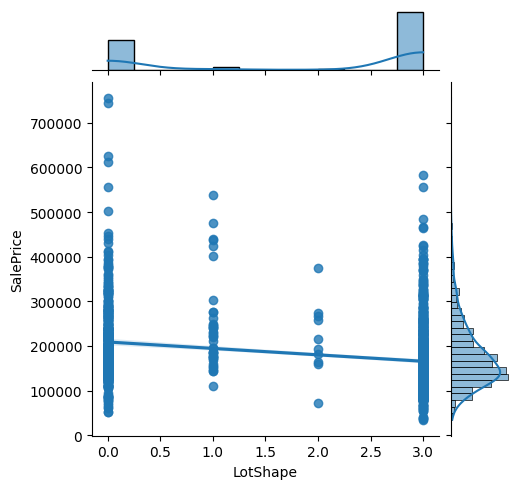

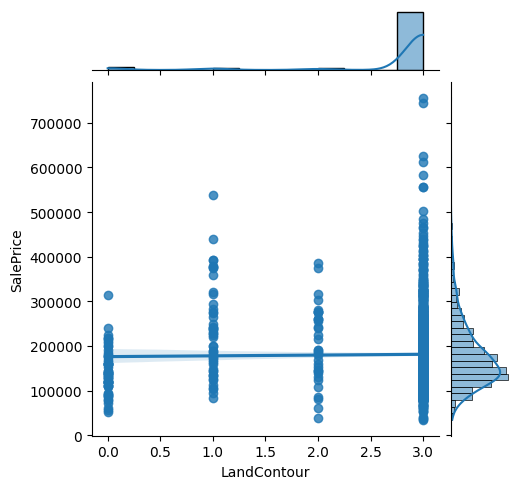

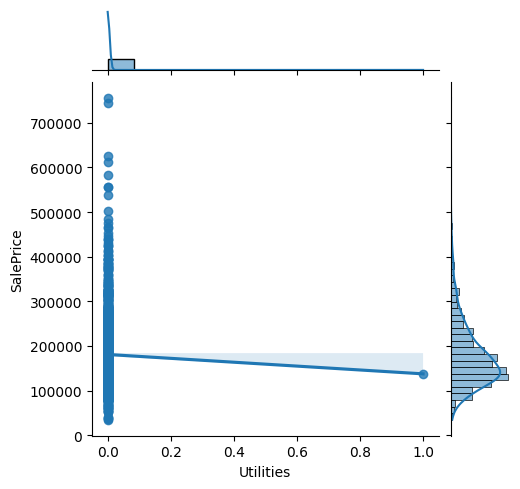

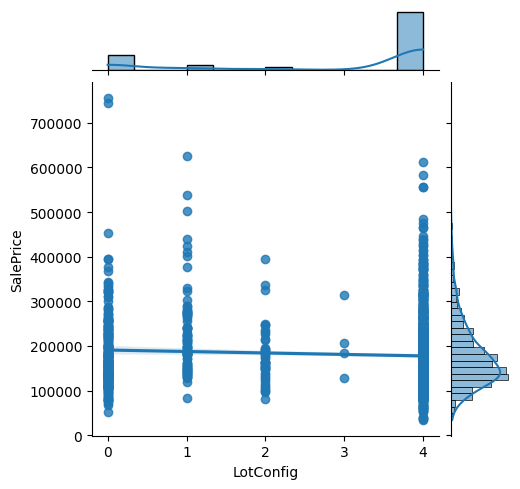

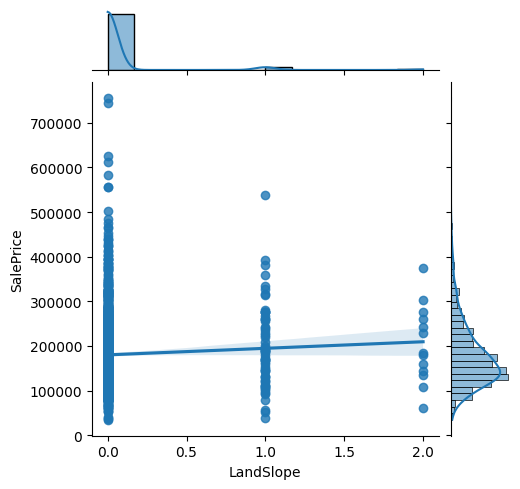

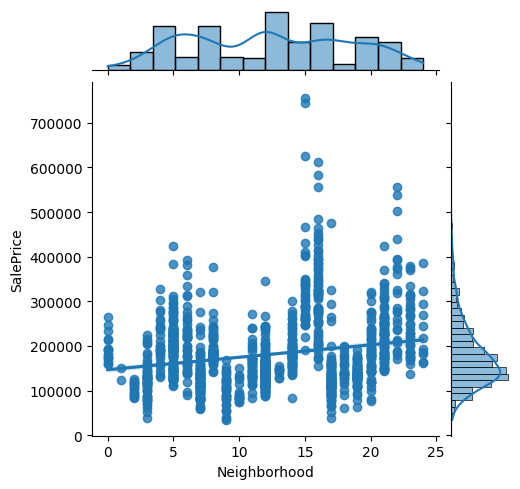

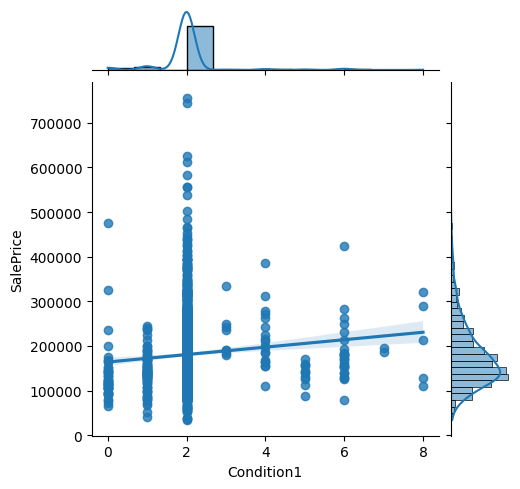

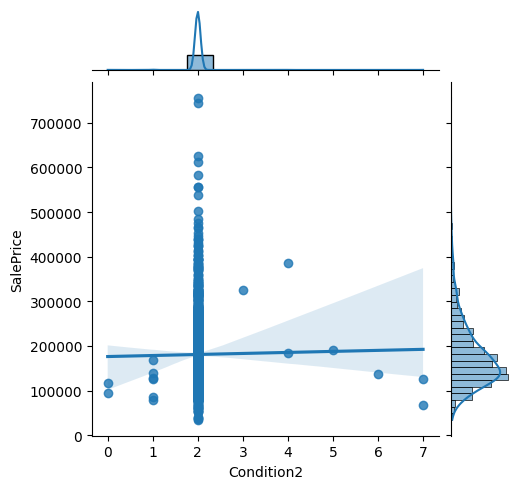

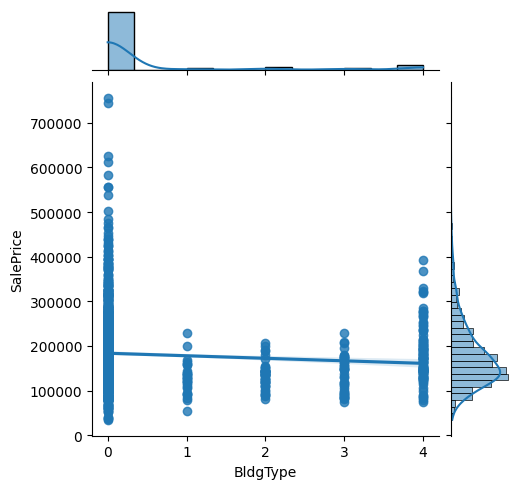

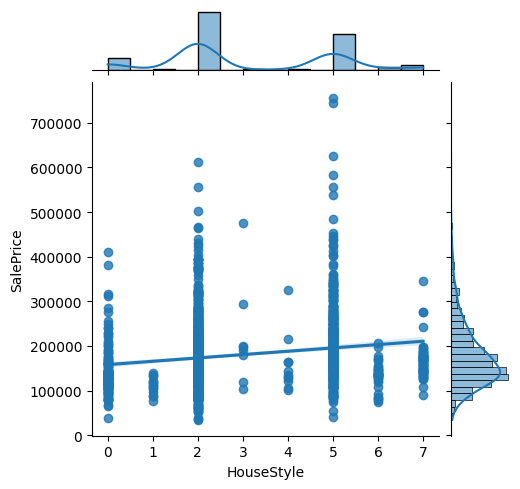

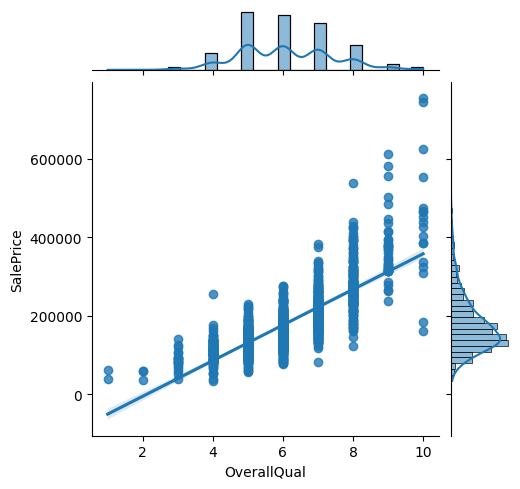

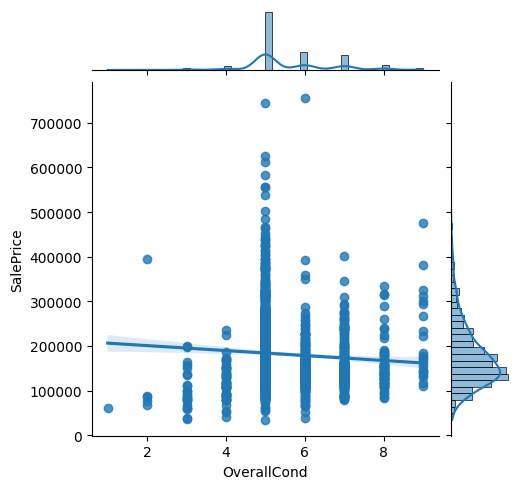

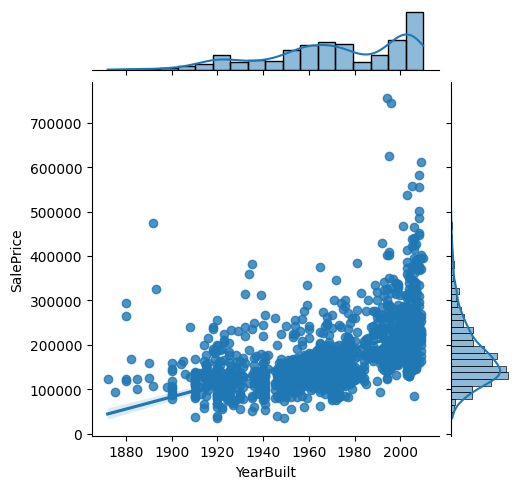

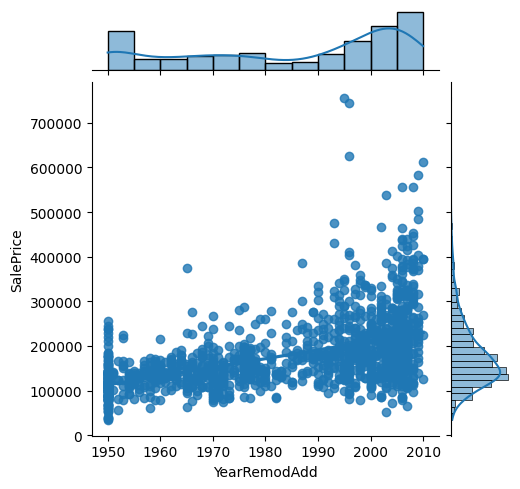

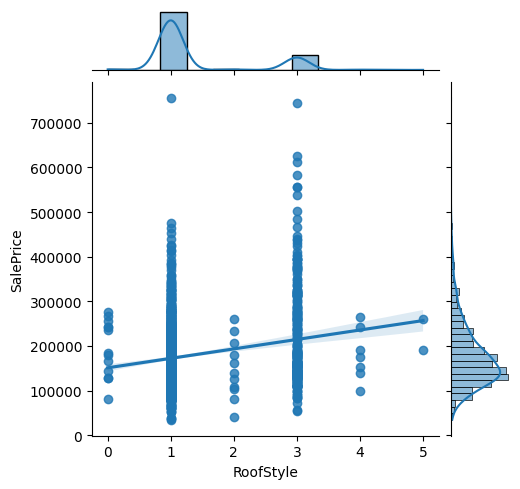

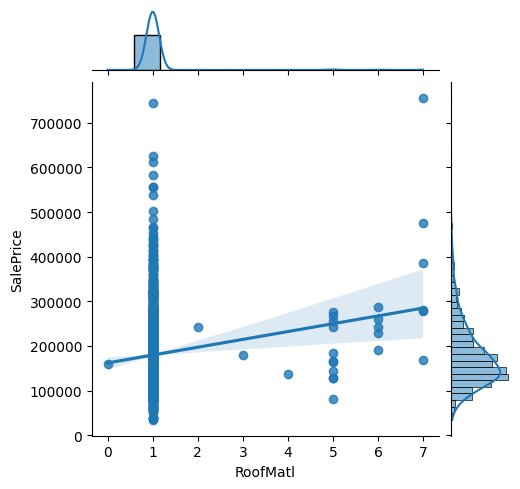

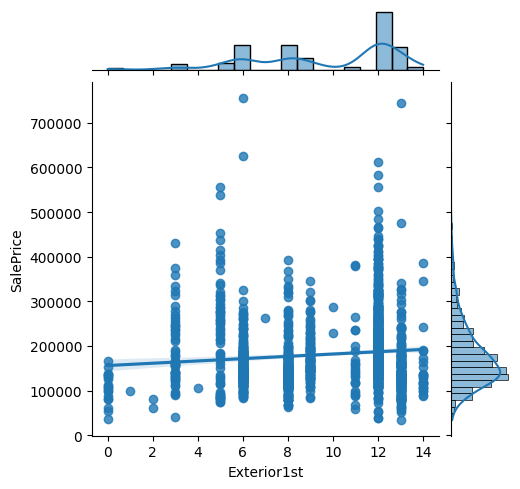

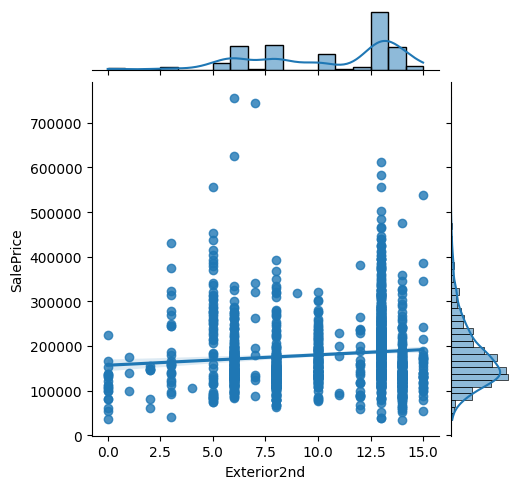

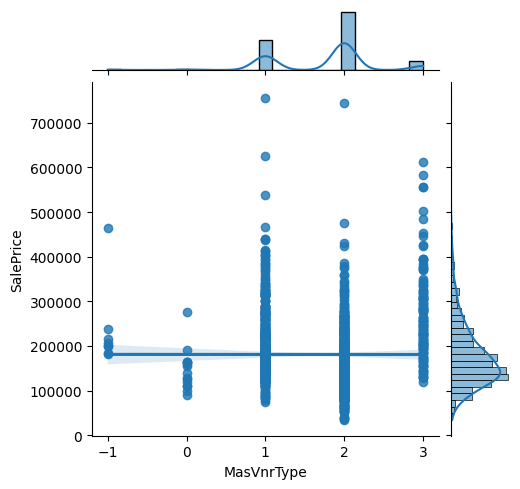

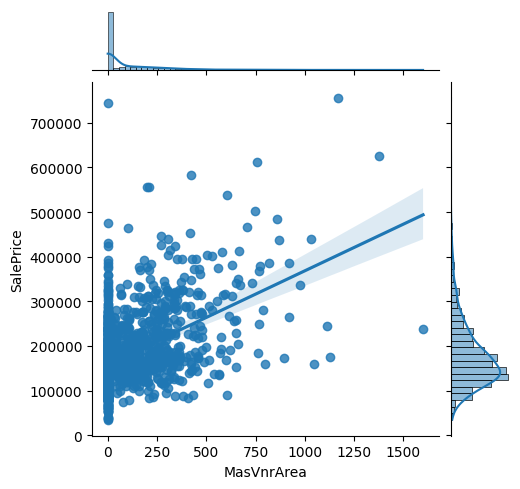

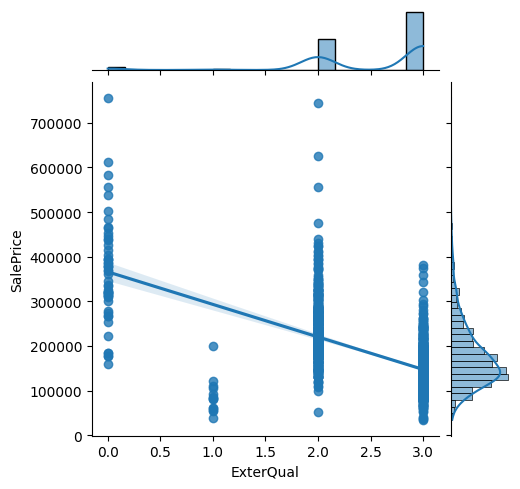

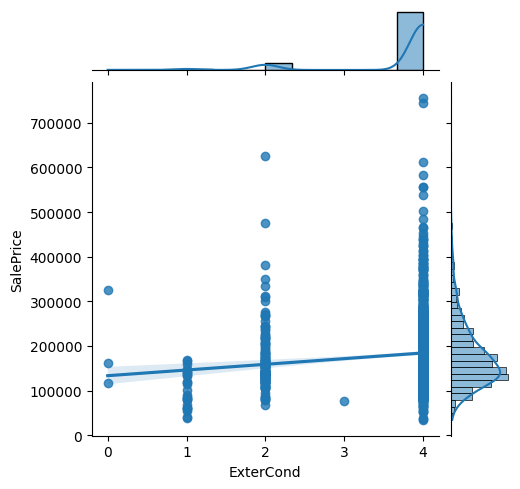

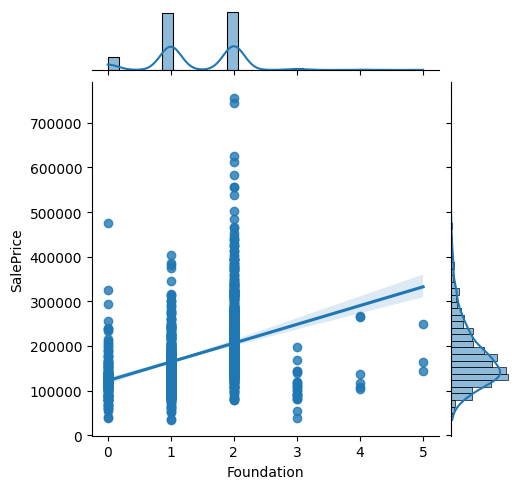

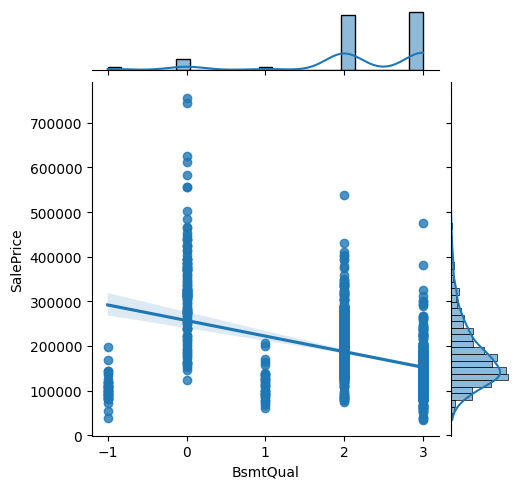

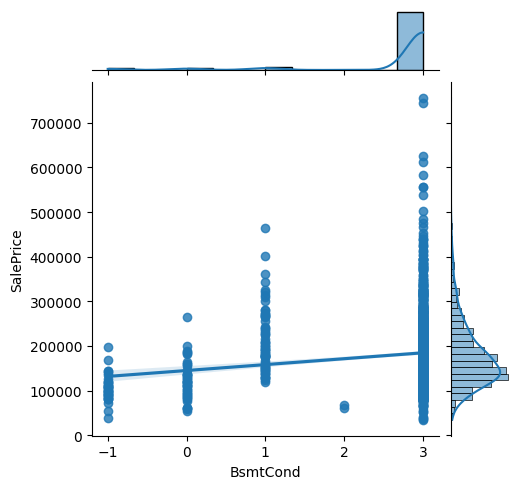

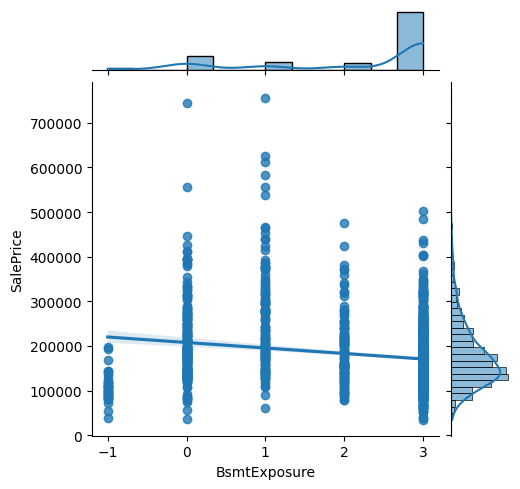

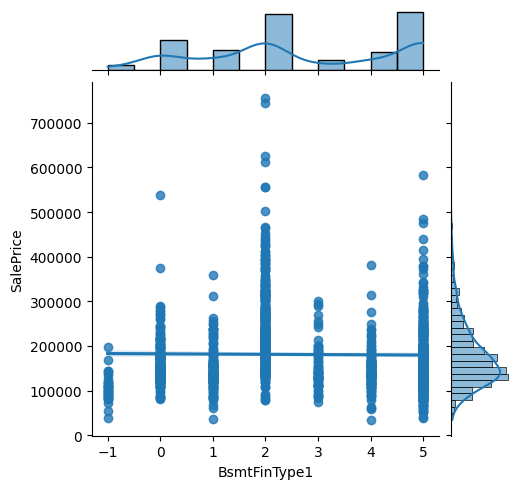

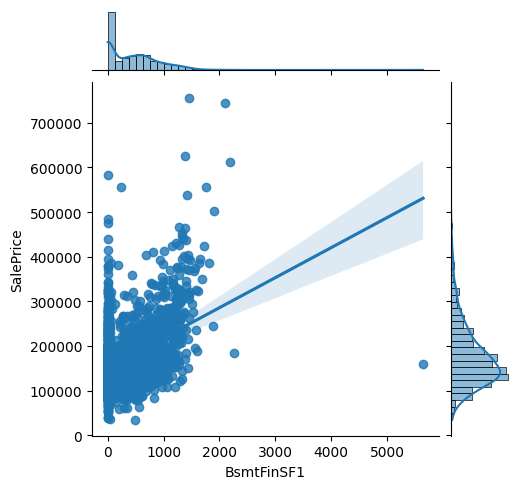

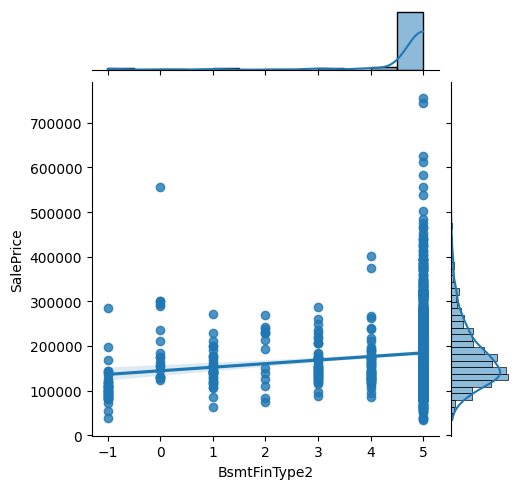

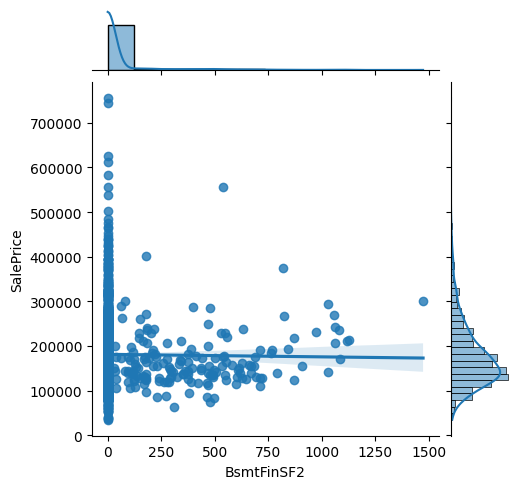

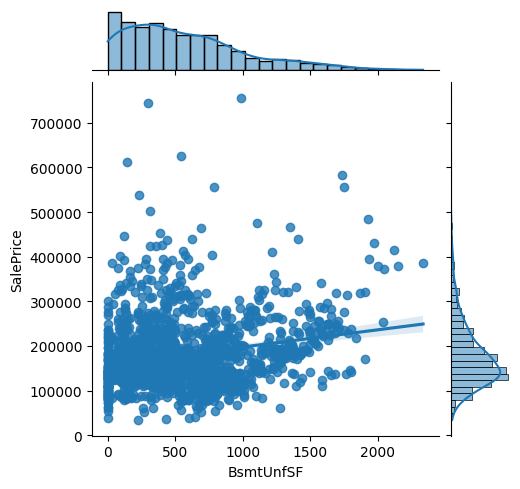

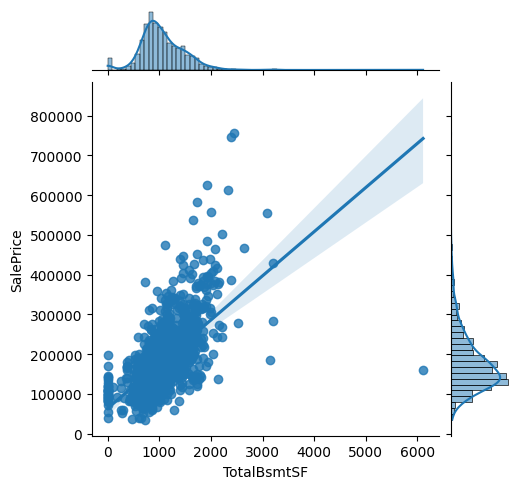

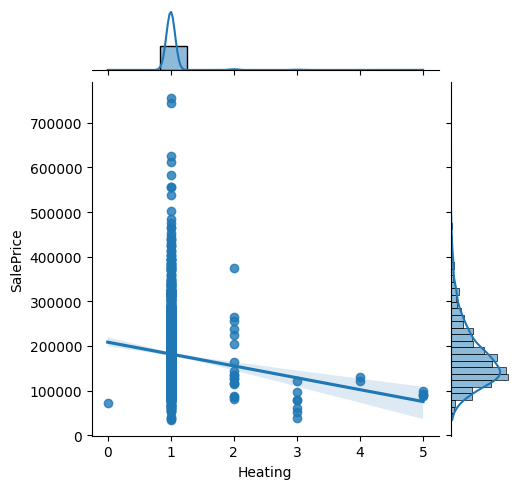

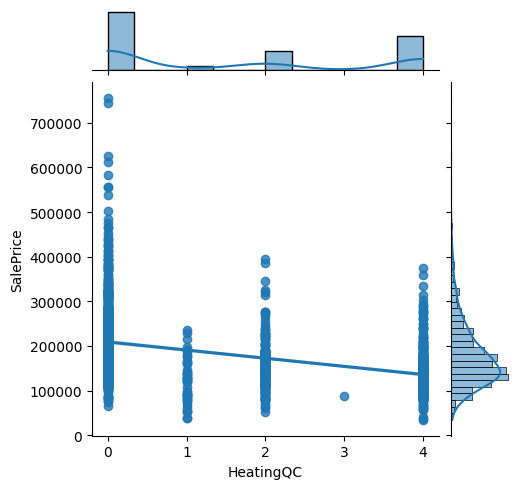

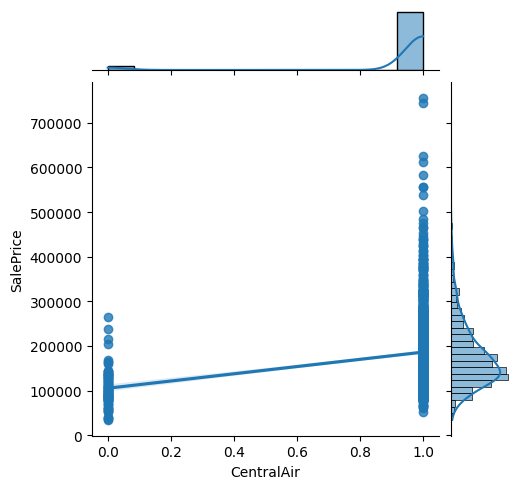

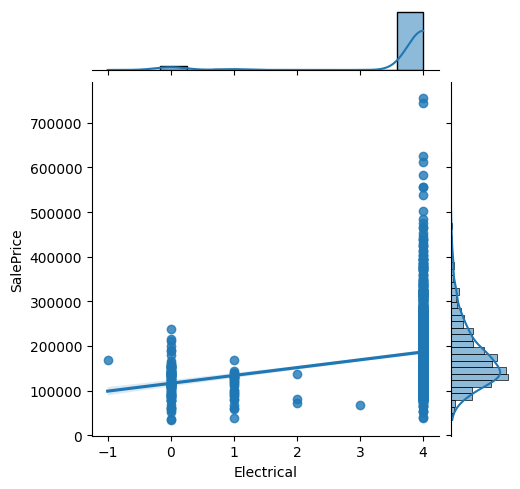

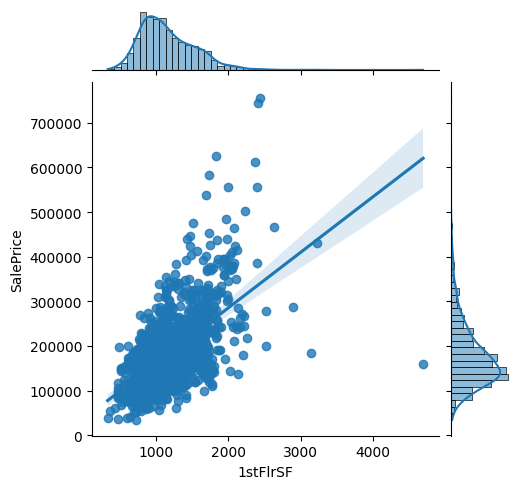

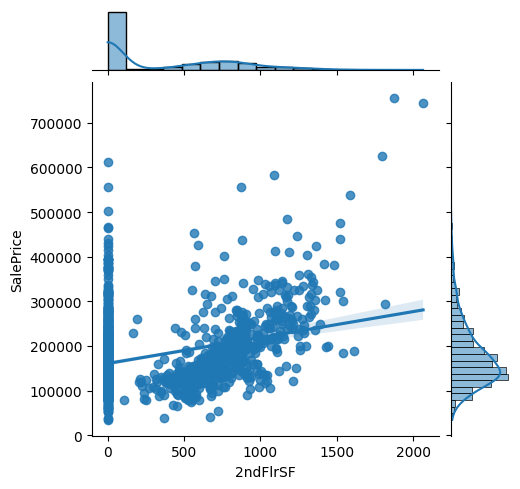

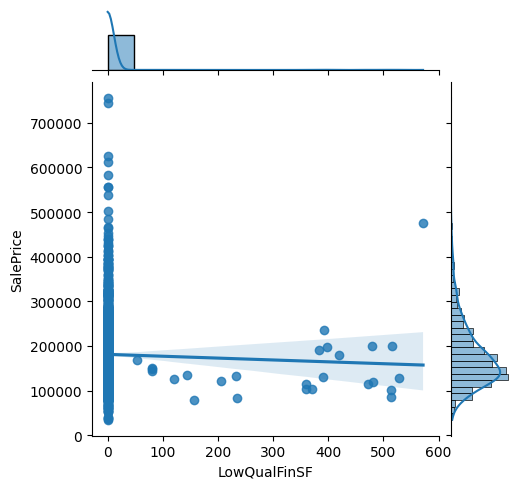

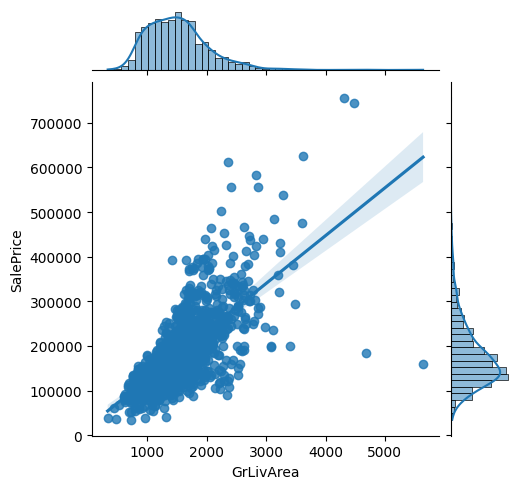

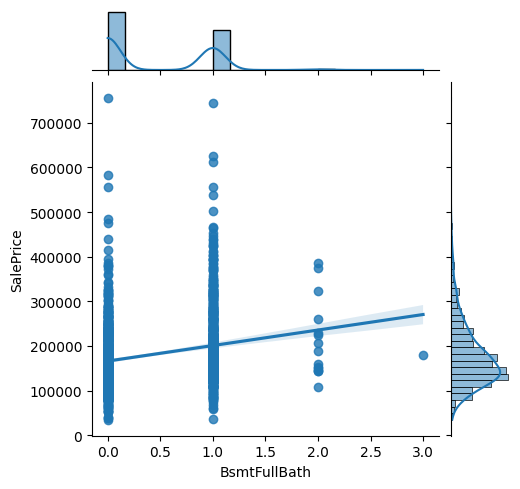

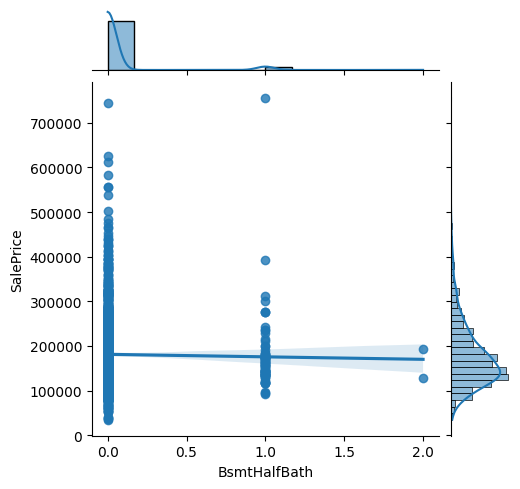

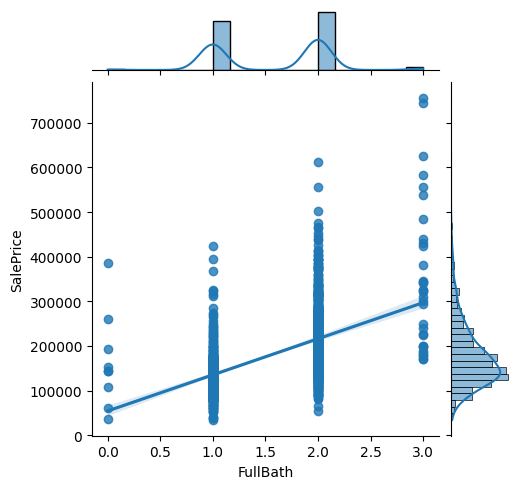

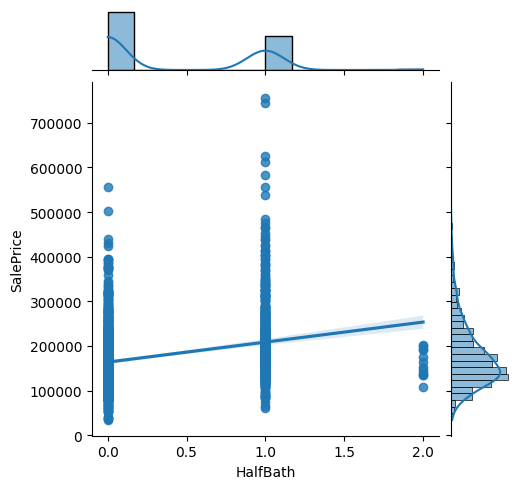

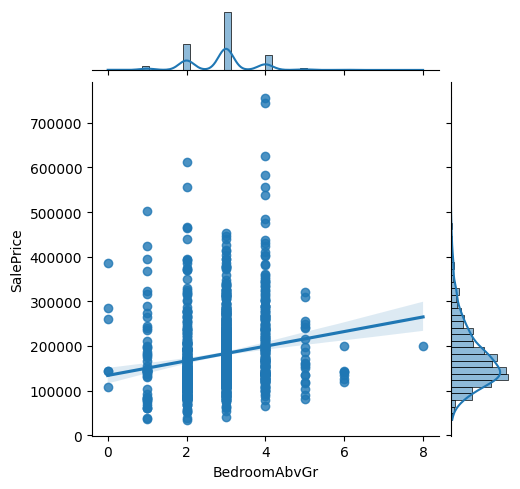

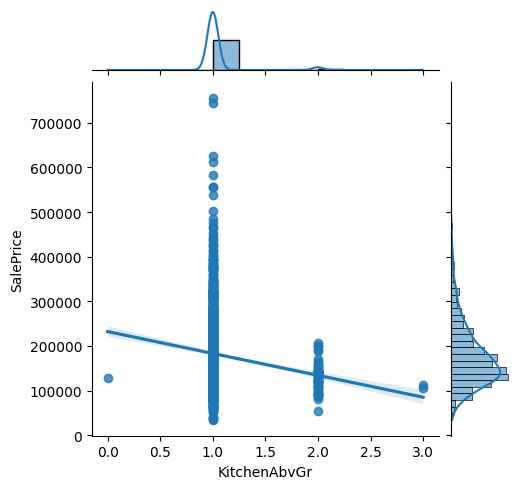

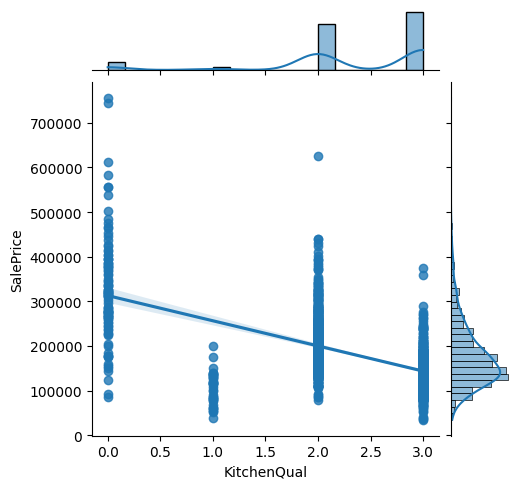

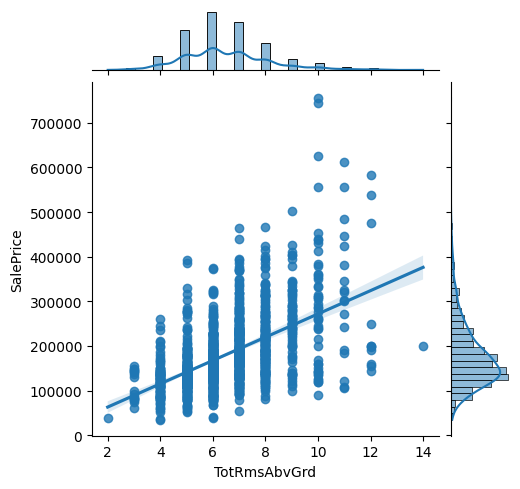

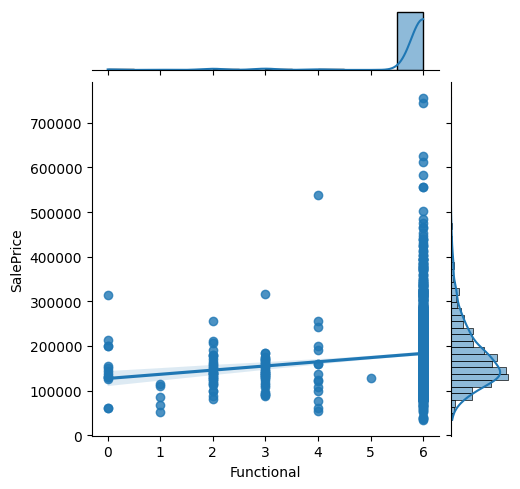

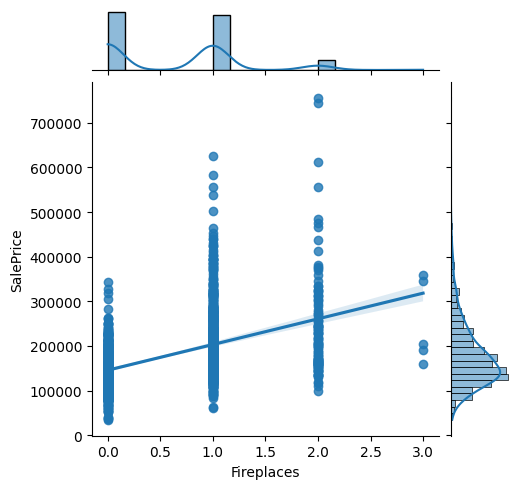

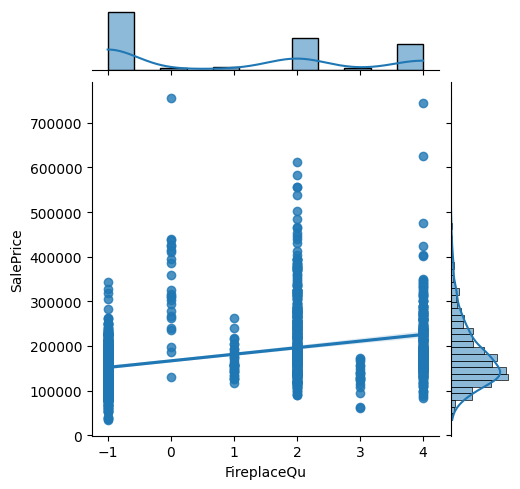

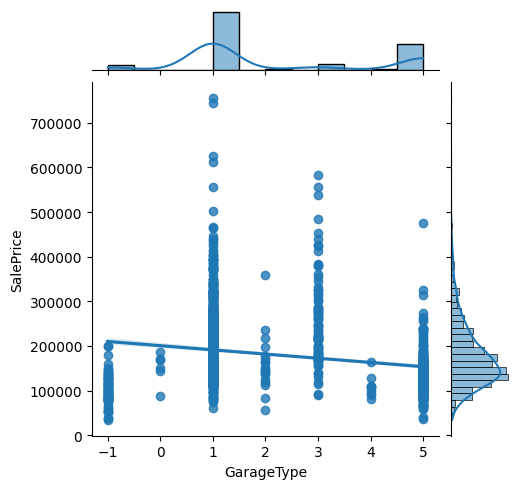

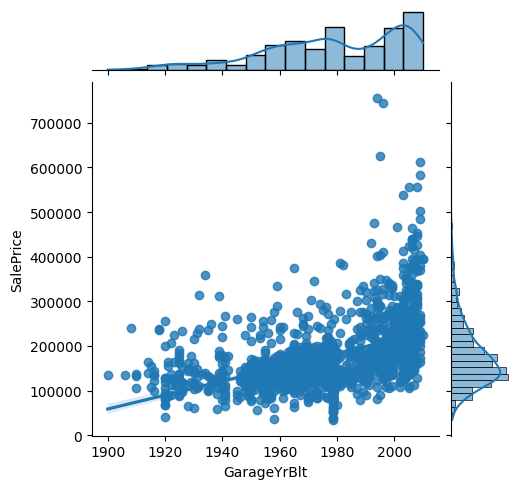

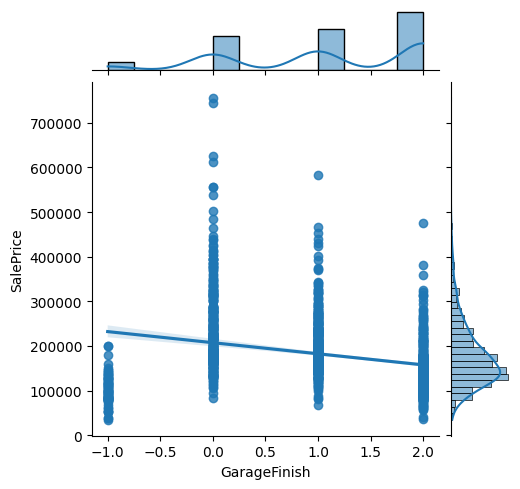

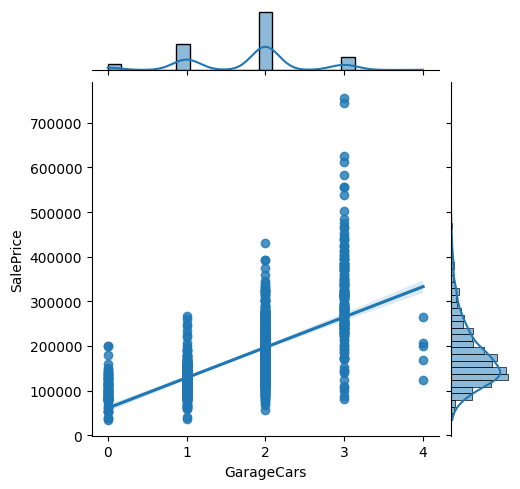

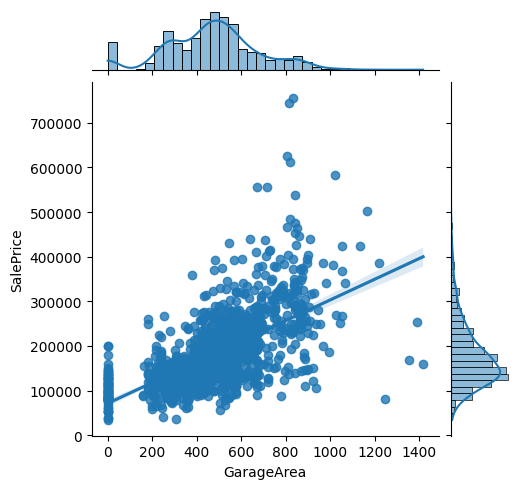

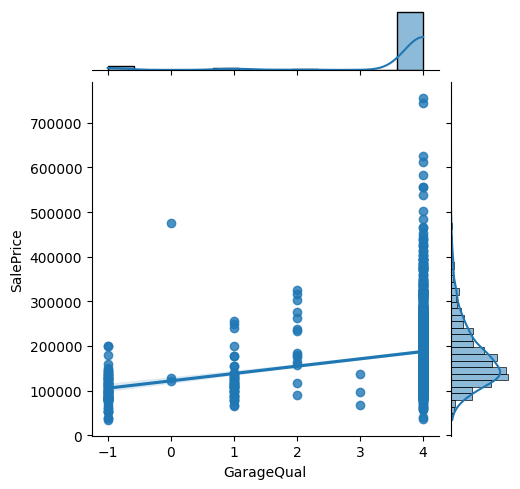

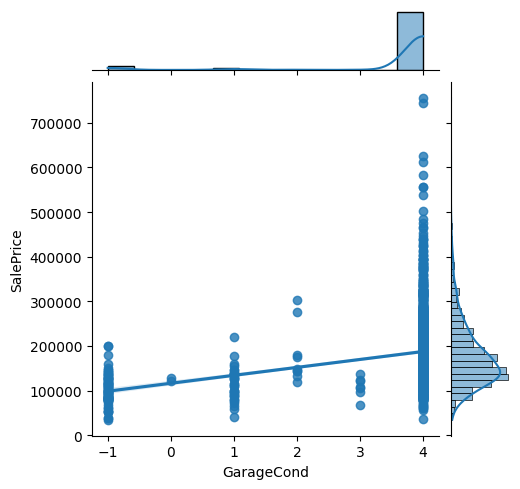

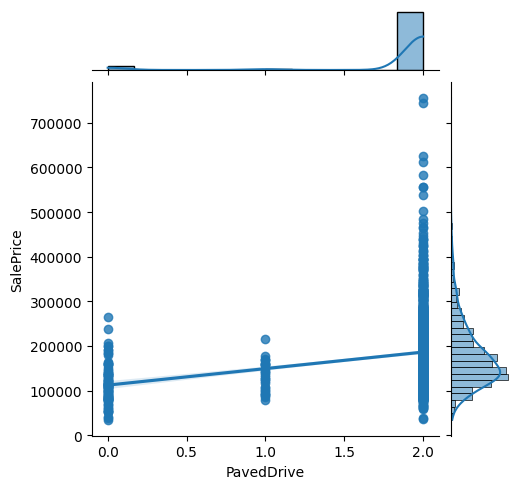

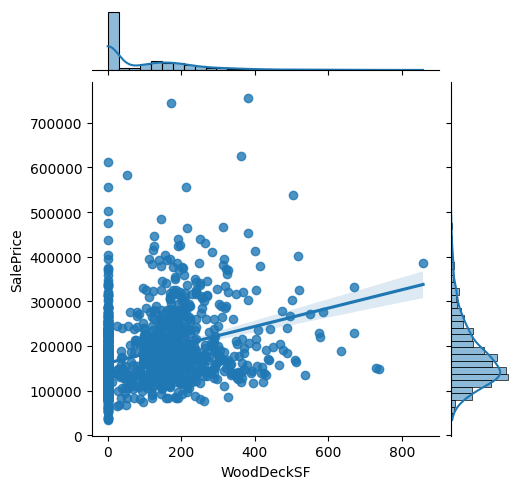

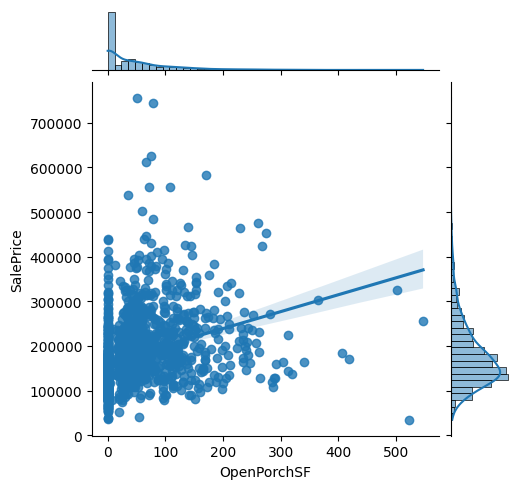

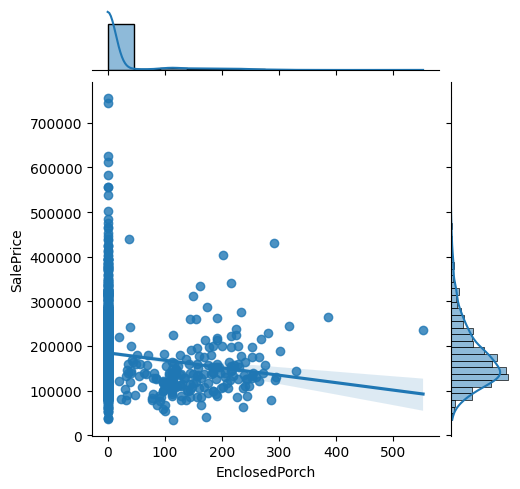

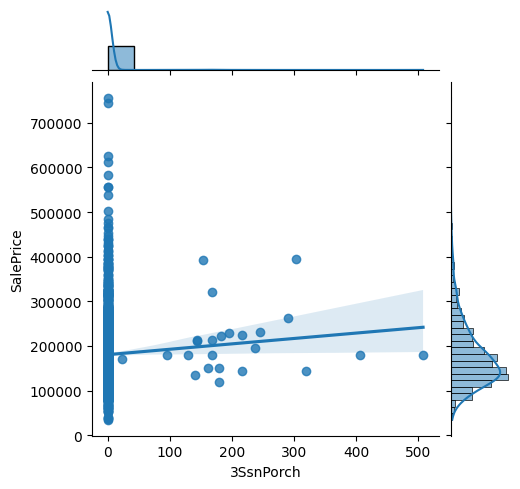

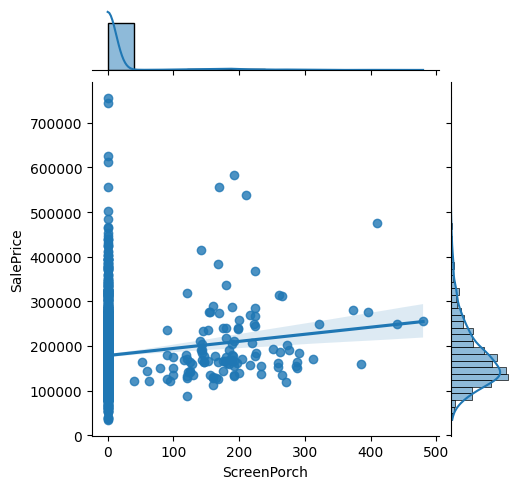

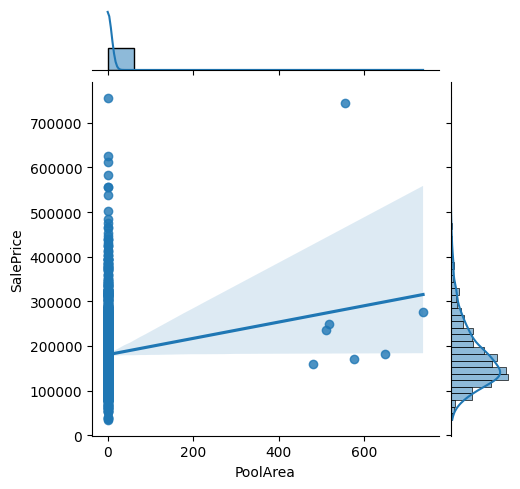

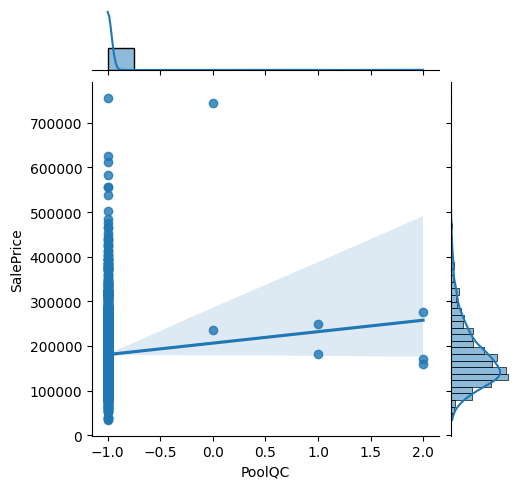

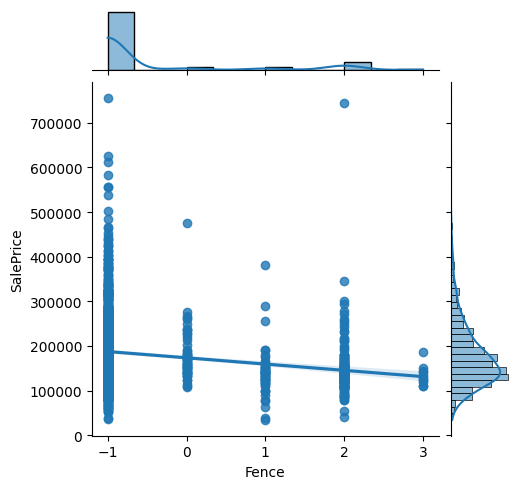

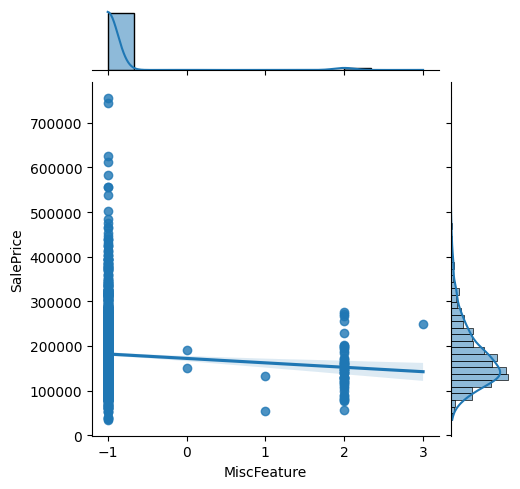

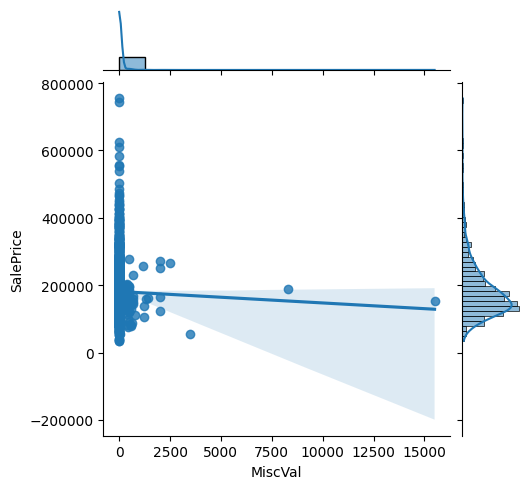

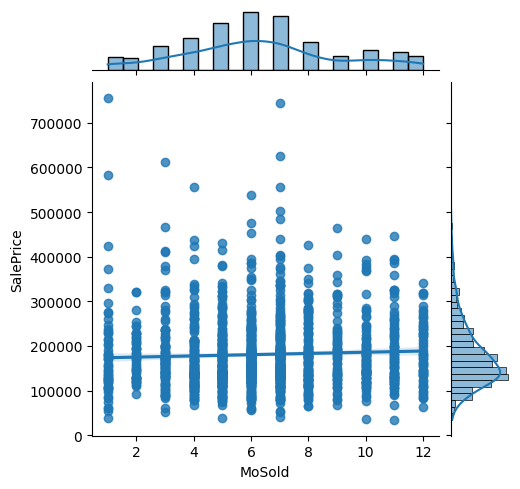

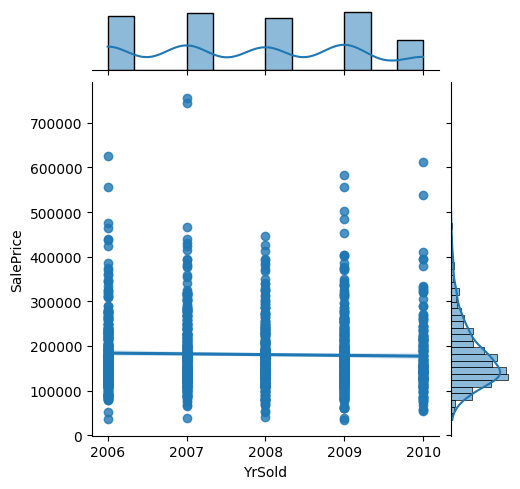

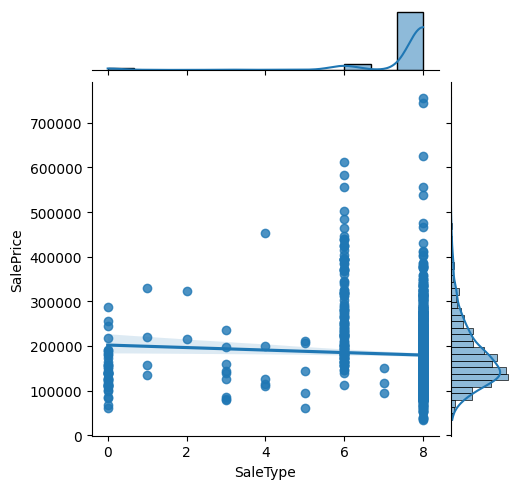

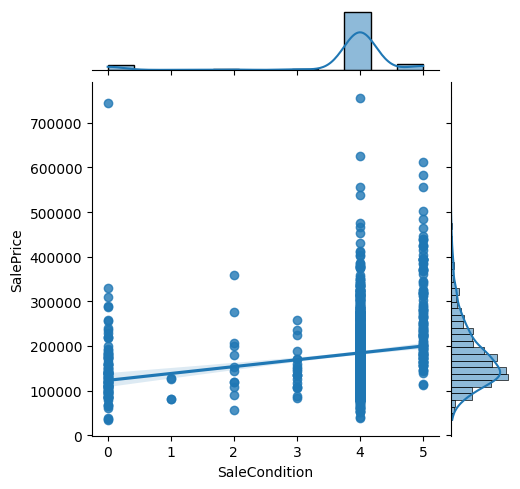

In [51]:
# plot joint plots
cols = train_data.columns.values
for c in cols:
    if c != "SalePrice":
        sns.jointplot(x=c, y="SalePrice", data=train_data, kind = 'reg', height = 5)
plt.show()

[Text(0, 0, 'Id'),
 Text(1, 0, 'MSSubClass'),
 Text(2, 0, 'MSZoning'),
 Text(3, 0, 'LotFrontage'),
 Text(4, 0, 'LotArea'),
 Text(5, 0, 'Street'),
 Text(6, 0, 'Alley'),
 Text(7, 0, 'LotShape'),
 Text(8, 0, 'LandContour'),
 Text(9, 0, 'Utilities'),
 Text(10, 0, 'LotConfig'),
 Text(11, 0, 'LandSlope'),
 Text(12, 0, 'Neighborhood'),
 Text(13, 0, 'Condition1'),
 Text(14, 0, 'Condition2'),
 Text(15, 0, 'BldgType'),
 Text(16, 0, 'HouseStyle'),
 Text(17, 0, 'OverallQual'),
 Text(18, 0, 'OverallCond'),
 Text(19, 0, 'YearBuilt'),
 Text(20, 0, 'YearRemodAdd'),
 Text(21, 0, 'RoofStyle'),
 Text(22, 0, 'RoofMatl'),
 Text(23, 0, 'Exterior1st'),
 Text(24, 0, 'Exterior2nd'),
 Text(25, 0, 'MasVnrType'),
 Text(26, 0, 'MasVnrArea'),
 Text(27, 0, 'ExterQual'),
 Text(28, 0, 'ExterCond'),
 Text(29, 0, 'Foundation'),
 Text(30, 0, 'BsmtQual'),
 Text(31, 0, 'BsmtCond'),
 Text(32, 0, 'BsmtExposure'),
 Text(33, 0, 'BsmtFinType1'),
 Text(34, 0, 'BsmtFinSF1'),
 Text(35, 0, 'BsmtFinType2'),
 Text(36, 0, 'BsmtFinSF2'

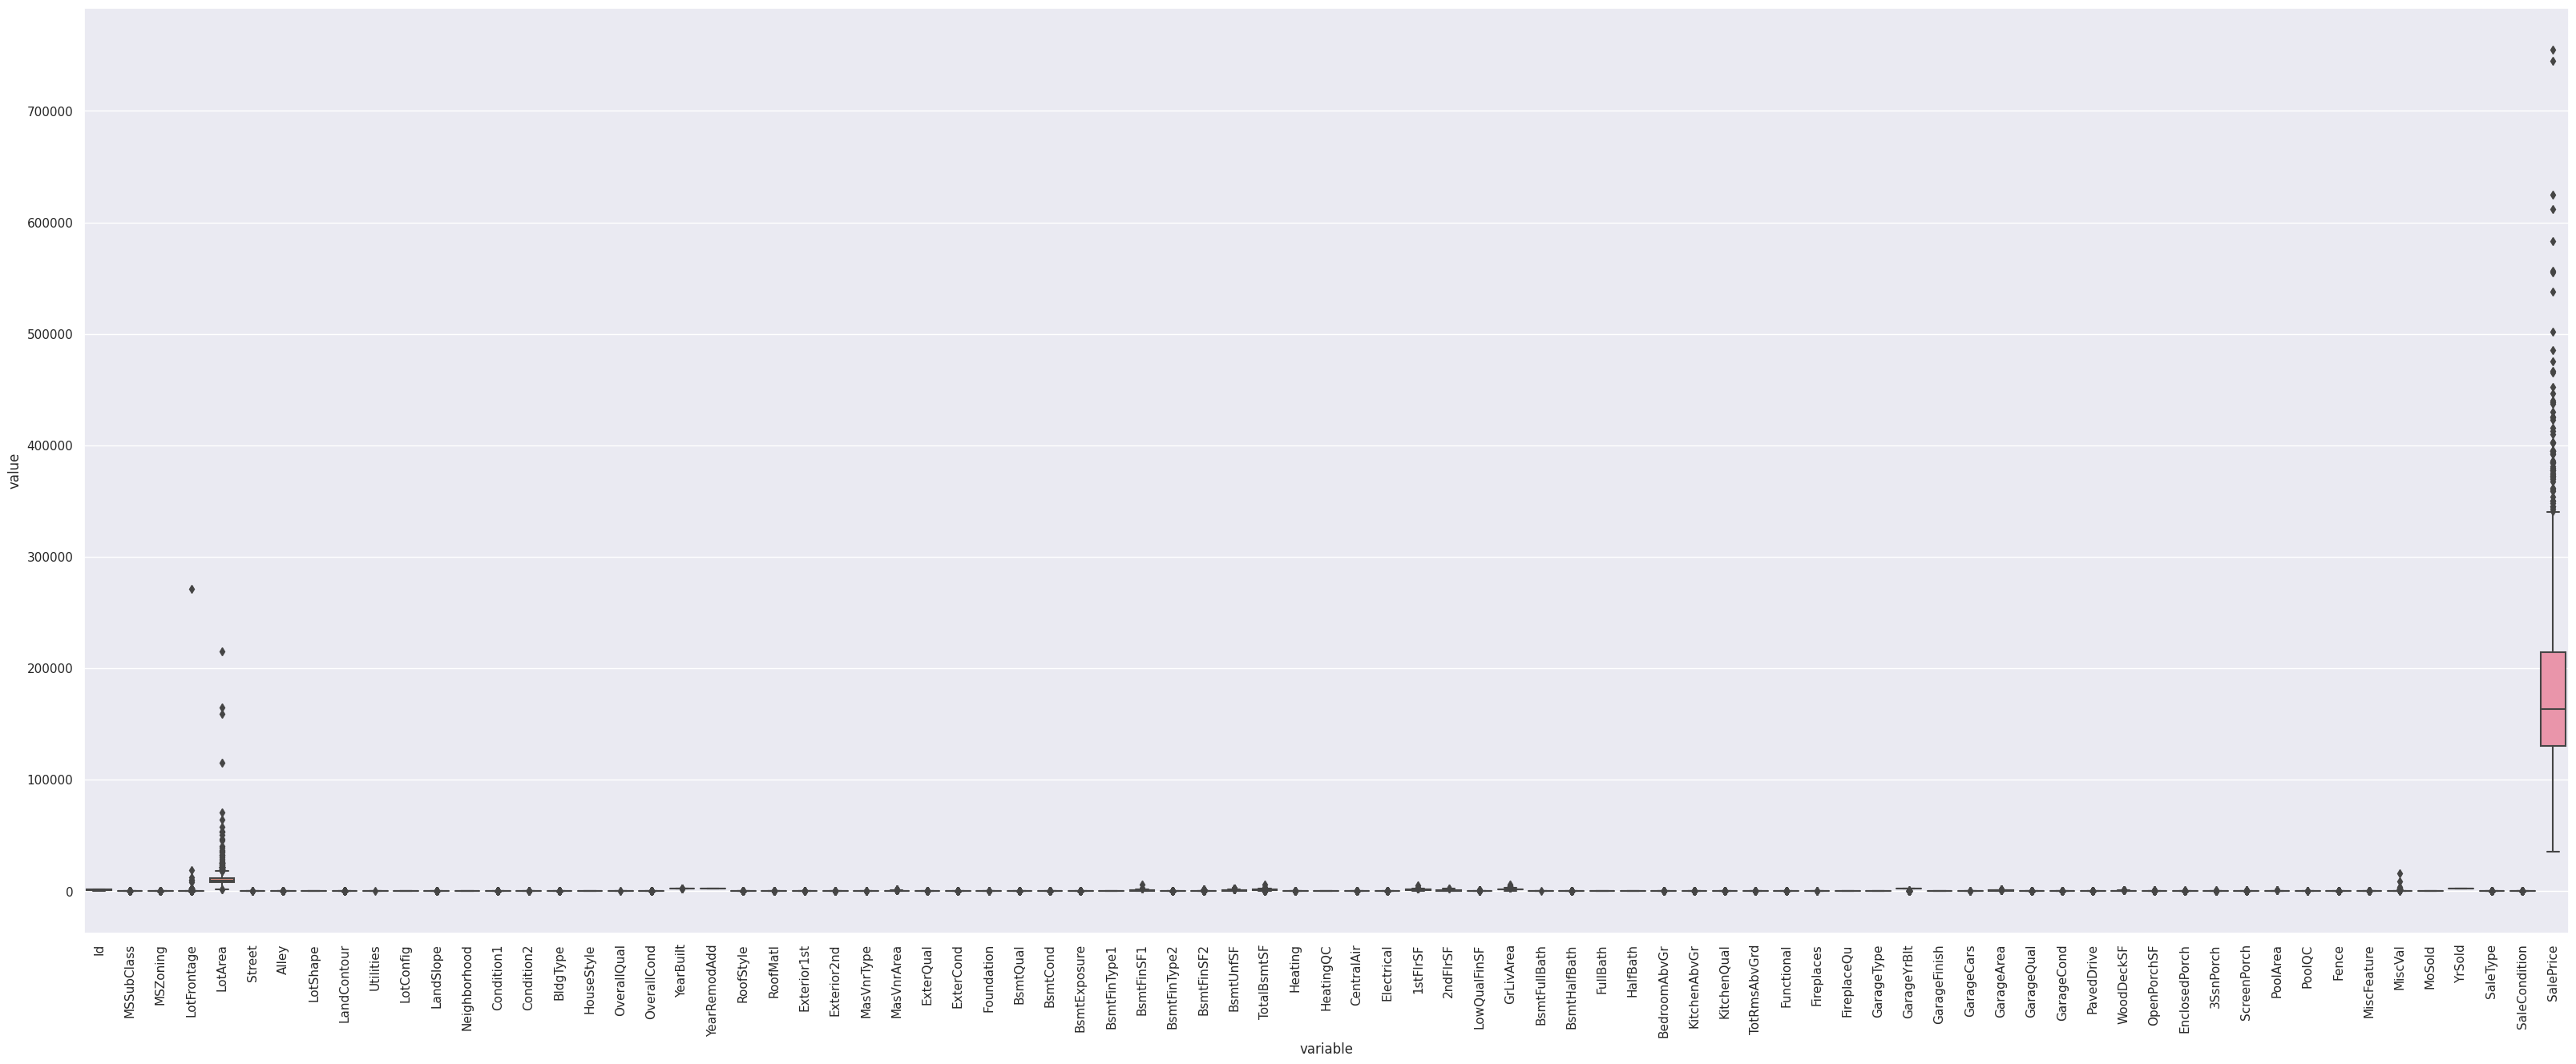

In [143]:
sns.set(rc={'figure.figsize':(40,15)})
b= sns.boxplot(x="variable",y="value",data=pd.melt(df))
b.set_xticklabels(b.get_xticklabels(), rotation=90)

<Axes: >

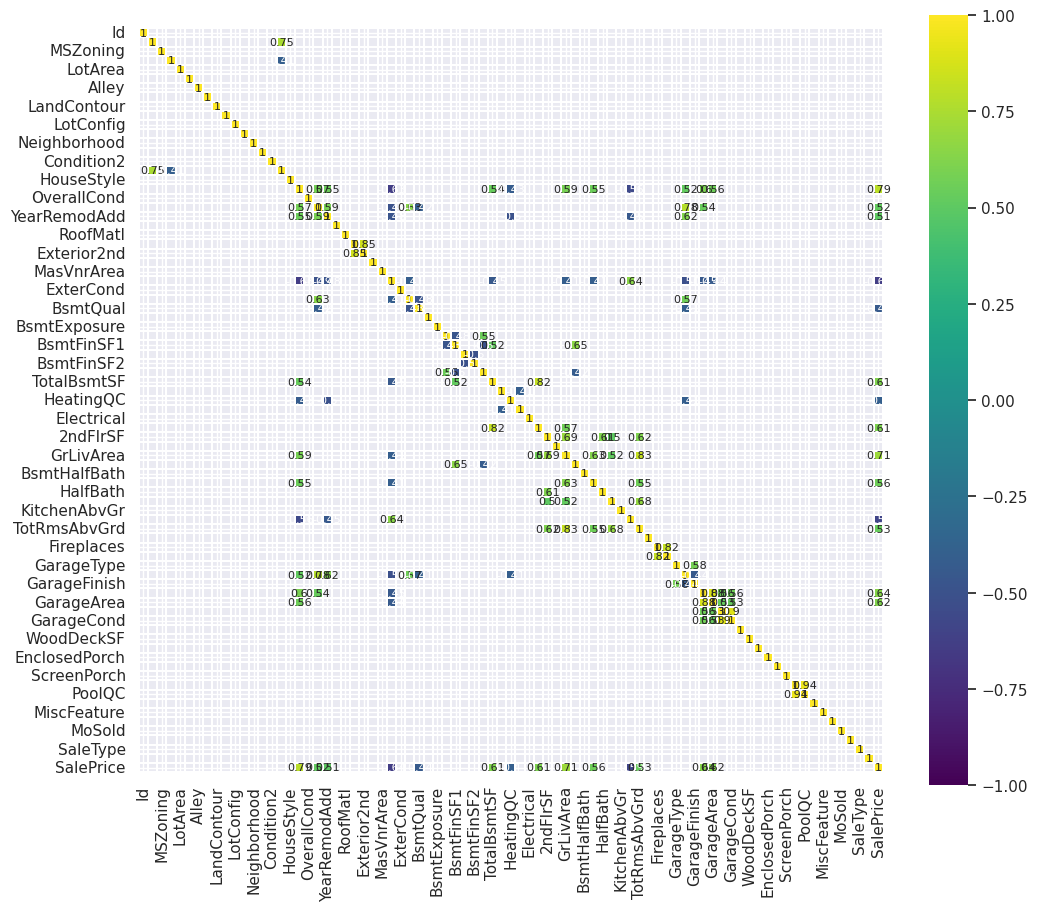

In [144]:
# Correlation heatmap
corr = train_data.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

<ipython-input-146-4edd8a5127c4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'])


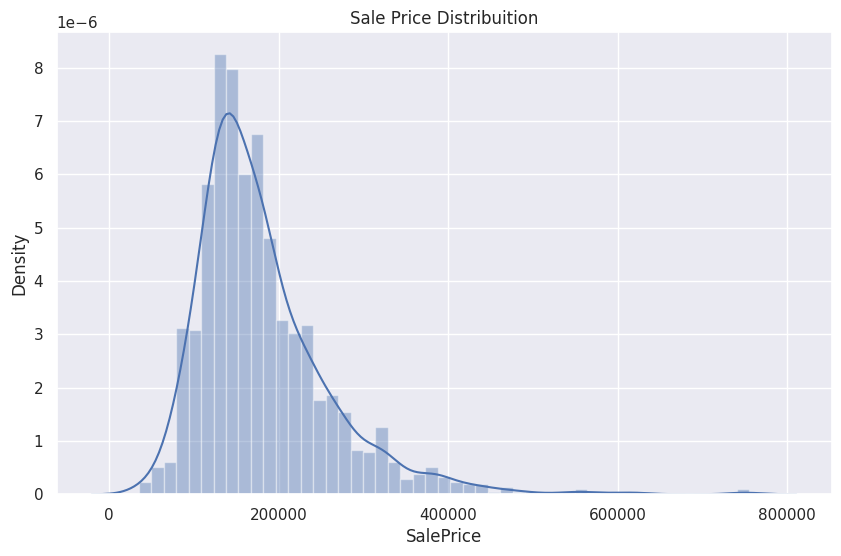

In [146]:
# distribution plot of target variable (life expectancy)
plt.figure(figsize = (10, 6))
plt.title('Sale Price Distribuition')
sns.distplot(train_data['SalePrice'])
plt.show()

Feature Selection
After performing a thorough analysis, we can select useful features required and train the model using those features. Sometimes, we can simply pass all the features and then determine important features from the trained classifier by evaluating the weights assigned by the classifier to each features. We'll get to that later on.

In [147]:
# calculate correlation matrix

corr_matrix = df.corr().abs()

# print correlation matrix

print(corr_matrix)

                     Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156  0.006096     0.018772  0.033226   
MSSubClass     0.011156    1.000000  0.035900     0.011178  0.139781   
MSZoning       0.006096    0.035900  1.000000     0.003304  0.034452   
LotFrontage    0.018772    0.011178  0.003304     1.000000  0.013039   
LotArea        0.033226    0.139781  0.034452     0.013039  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.021172    0.013585  0.031496     0.005440  0.001205   
YrSold         0.000712    0.021407  0.020628     0.001231  0.014261   
SaleType       0.019773    0.012464  0.097437     0.010559  0.012292   
SaleCondition  0.005806    0.024940  0.009494     0.007463  0.034169   
SalePrice      0.021917    0.084284  0.166872     0.028505  0.263843   

                 Street     Alley  LotShape  LandContour  Utilities  ...  \
Id             0.008916  0.001530  0.032122     0.019659   

In [157]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

# define number of features to keep

k = 50

# perform feature selection

X_new = SelectKBest(f_regression, k=k).fit_transform(X, y)

# get feature names of selected features

selected_features = X.columns[SelectKBest(f_regression, k=k).fit(X, y).get_support()]

# print selected features

print(selected_features)

Index(['MSZoning', 'LotArea', 'Alley', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC', 'Fence',
       'SaleCondition'],
      dtype='object')


In [160]:
X_selected = X[selected_features]
print(selected_features)
print(f"Shape of X_selected: {X_selected.shape}")

Index(['MSZoning', 'LotArea', 'Alley', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC', 'Fence',
       'SaleCondition'],
      dtype='object')
Shape of X_selected: (1460, 50)


Model Training
This is a Regression problem since we are predicting life expetancy which is a continous random variable. The steps involved are as follows:

Standardize or Normalize Training Data
Train Test Split
Train Model
Evaluate Important Features
Note: It's a good practice to train multiple models (2 or 3 at least) and then choose the best performing model.

In [162]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
[]


In [163]:
from sklearn.preprocessing import StandardScaler
cols=categorical_cols

In [164]:
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])


In [166]:
# Train Test Split

from sklearn.model_selection import train_test_split
y = train_data['SalePrice']
X = train_data.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (1168, 80)
Validation Set Dimensions: (292, 80)


In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

randomf = RandomForestRegressor(n_estimators=200)
randomf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [155]:
# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(X_test)))

Mean Absolute Error for Training Set: 6471.451545376712
Mean Absolute Error for Test Set: 17619.79948630137


feature: MSSubClass = 0.0018619080000455846
feature: MSZoning = 0.0012428257610421459
feature: LotFrontage = 0.007210146564174465
feature: LotArea = 0.0157364084321043
feature: Street = 7.111849901342531e-07
feature: Alley = 0.0005001992394129486
feature: LotShape = 0.0013021569140110906
feature: LandContour = 0.0014899981479407852
feature: Utilities = 8.516538599838596e-07
feature: LotConfig = 0.0008919688745729352
feature: LandSlope = 0.0004655125927879566
feature: Neighborhood = 0.008516831546193107
feature: Condition1 = 0.0005583647343346016
feature: Condition2 = 0.00024395252286853417
feature: BldgType = 0.0004310329535480723
feature: HouseStyle = 0.0007495970139029413
feature: OverallQual = 0.5514023541725156
feature: OverallCond = 0.004357192337246739
feature: YearBuilt = 0.012026039219514749
feature: YearRemodAdd = 0.008338660492567766
feature: RoofStyle = 0.0006140650432961375
feature: RoofMatl = 0.0001892069917820129
feature: Exterior1st = 0.0010949181580190346
feature: Exter

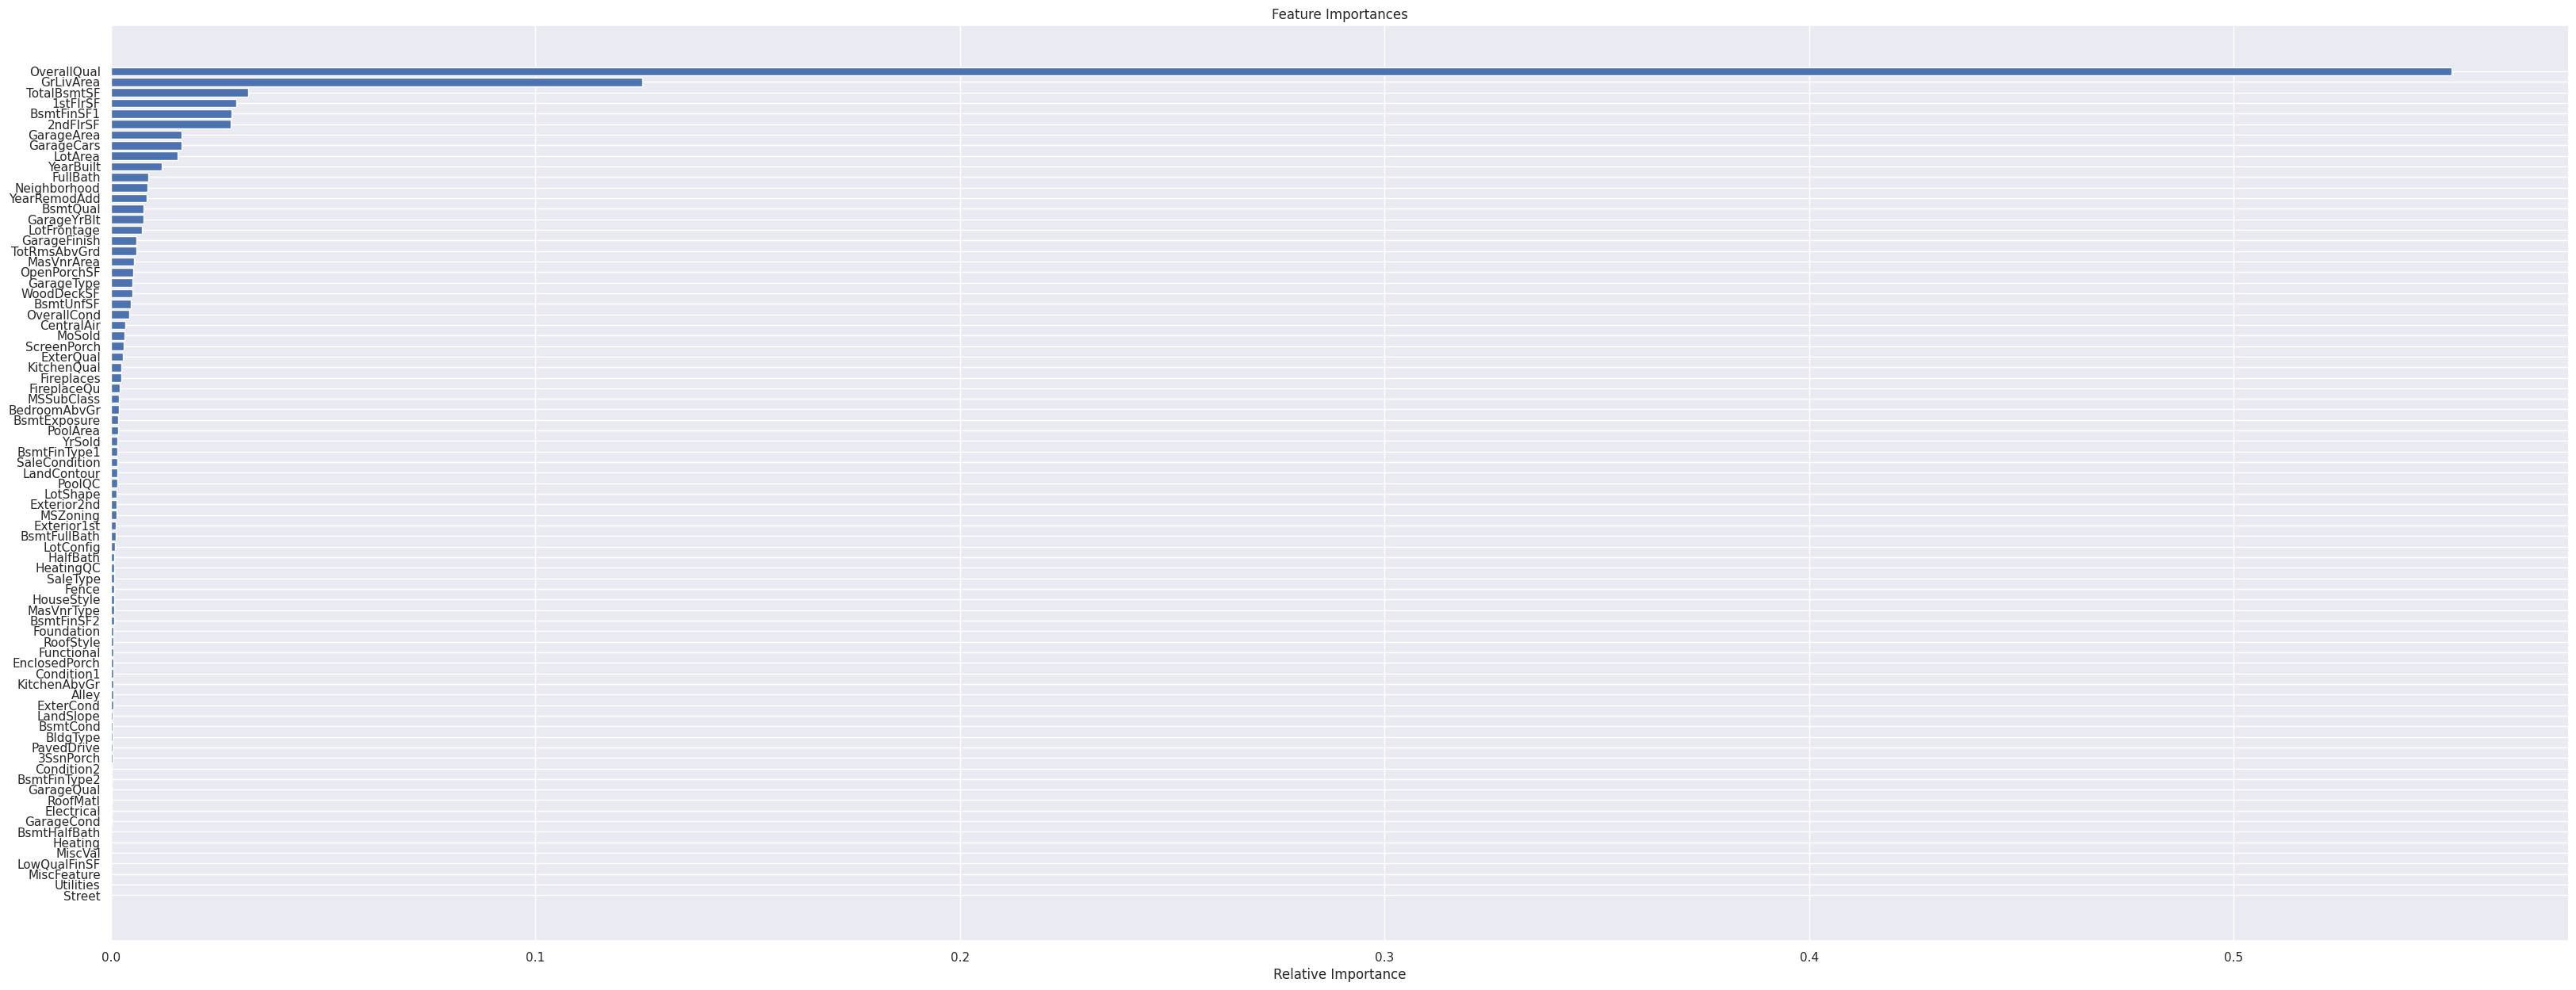

In [156]:
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)

importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Testing and Optimization
After training your model and establishing a baseline performance on default parameters, you have to work on optimizaing it to achieve best results. For this you have to perform hyper-parameter tuning and there are a couple of ways to do this but an efficient solution is using Grid-Search-Cross-Validation approach where you form a grid of parameters and iteratively apply cross-validation to find the best set of parameters for which our model performs the best.

In [167]:
# parameter grid for fine-tuning random forest regressor
# you can take a look at scikit-learn official documentation
# where you'll find the parameters of random forest regressor
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12],
          'max_features': [2, 4, 6],
          'min_samples_leaf': [3, 4, 5],
          'min_samples_split': [8, 10, 12],
          'n_estimators': [100, 200, 300]}

k = 5
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=-1, cv=k, verbose=True)
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 12], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=True)

In [168]:
# parameter grid for fine-tuning random forest regressor
# you can take a look at scikit-learn official documentation
# where you'll find the parameters of random forest regressor
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12],
          'max_features': [2, 4, 6],
          'min_samples_leaf': [3, 4, 5],
          'min_samples_split': [8, 10, 12],
          'n_estimators': [100, 200, 300]}

k = 5
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=-1, cv=k, verbose=True)
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 12], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=True)

In [169]:
from sklearn import metrics

# get best model (trained on best set of params) from grid search cv
best_model = rf_grid.best_estimator_

# get best model predictions for training and validation sets
predict_train = best_model.predict(X_train)
predict_test = best_model.predict(X_test)

# print mean absolute error for predictions taken from the best model
print('Mean Absolute Error for Training Set:', metrics.mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', metrics.mean_absolute_error(y_test, predict_test))

Mean Absolute Error for Training Set: 0.15890109098828845
Mean Absolute Error for Validation Set: 0.2049209084404342
